# Análise Exporatória dos Dados
### Atributos dos agentes Imóveis, entendimento do negócio, Insights e seleção de indicadores

## Importação Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importação da base

In [2]:
df = pd.read_excel(r'C:\Users\pfern\Desktop\Monografia\Dados\Dados_principal\Data_Frame.xlsx')

In [3]:
df.head()

,Início,Término,Tipo,Taxa de administração,Taxa adm,Aluguel,Vaga Garagem,Entrada_imobiliaria,Lugar,Numero_contrato,...,Tempo_total_dias,Portabilidade,Receita_imobiliaria,Receita_imobiliaria_ociosa,Receita_locador,Receita_locador_ociosa,Trim_inicio_contrato,Ano_contrato,Condominio,IPTU
0,2020-01-03,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2019-11-06,artarq 101,1,...,968,nao,8645.00000,551.00000,164255.00000,10469.00000,T1-2020,2020,1444.00,494.55
1,2020-01-20,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2020-01-03,artarq 162,1,...,910,nao,8483.50000,161.50000,161186.50000,3068.50000,T1-2020,2020,1444.00,494.55
2,2018-05-18,2020-11-01,Residencial,0.04,180.8436,4521.09,1,2018-01-27,artarq 193,1,...,1009,nao,5413.25176,669.12132,129918.04224,16058.91168,T2-2018,2018,800.39,308.98
3,2018-05-01,2020-04-24,Residencial,0.07,300.4323,4291.89,1,2018-03-15,artarq 203,1,...,771,nao,7250.43284,470.67727,96327.17916,6253.28373,T2-2018,2018,800.39,308.98
4,2020-04-24,2022-10-01,Residencial,0.07,304.5000,4350.00,1,2020-04-24,artarq 203,2,...,890,nao,9033.50000,0.00000,120016.50000,0.00000,T2-2020,2020,800.39,308.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Início                      173 non-null    datetime64[ns]
 1   Término                     173 non-null    datetime64[ns]
 2   Tipo                        173 non-null    object        
 3   Taxa de administração       173 non-null    float64       
 4   Taxa adm                    173 non-null    float64       
 5   Aluguel                     173 non-null    float64       
 6   Vaga Garagem                173 non-null    int64         
 7   Entrada_imobiliaria         173 non-null    datetime64[ns]
 8   Lugar                       173 non-null    object        
 9   Numero_contrato             173 non-null    int64         
 10  Endereco                    173 non-null    object        
 11  Latitude                    173 non-null    float64       

## Tratamento NA

In [5]:
na = df[df['Portabilidade'].isnull()]

In [6]:
df.loc[df['Portabilidade'].isnull(), 'Portabilidade'] = 'sim'

### Ajuste tipos de variáveis

In [7]:
df.dtypes

Início                        datetime64[ns]
Término                       datetime64[ns]
Tipo                                  object
Taxa de administração                float64
Taxa adm                             float64
Aluguel                              float64
Vaga Garagem                           int64
Entrada_imobiliaria           datetime64[ns]
Lugar                                 object
Numero_contrato                        int64
Endereco                              object
Latitude                             float64
Longitude                            float64
Tempo_ocupado                          int64
Tempo_vago                             int64
Tempo_total_dias                       int64
Portabilidade                         object
Receita_imobiliaria                  float64
Receita_imobiliaria_ociosa           float64
Receita_locador                      float64
Receita_locador_ociosa               float64
Trim_inicio_contrato                  object
Ano_contra

In [8]:
df['Ano_contrato'] = df['Ano_contrato'].astype('str')

## Separação de variáveis numéricas em variáveis categóricas

In [9]:
num = df.select_dtypes(include = ['int64', 'float64'])
cat = df.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

## Eliminando colunas irrelevantes
### variáveis que não apresentam nenhuma informação relevante ou correlação conhecida a priori 

In [10]:
num.drop(['Taxa de administração', 'Numero_contrato', 'Latitude', 'Longitude'], axis = 1, inplace = True)

C:\Users\pfern\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Análise de correlação de Pearson (variáveis numéricas)

In [11]:
corr_num = num.corr(method = 'pearson')

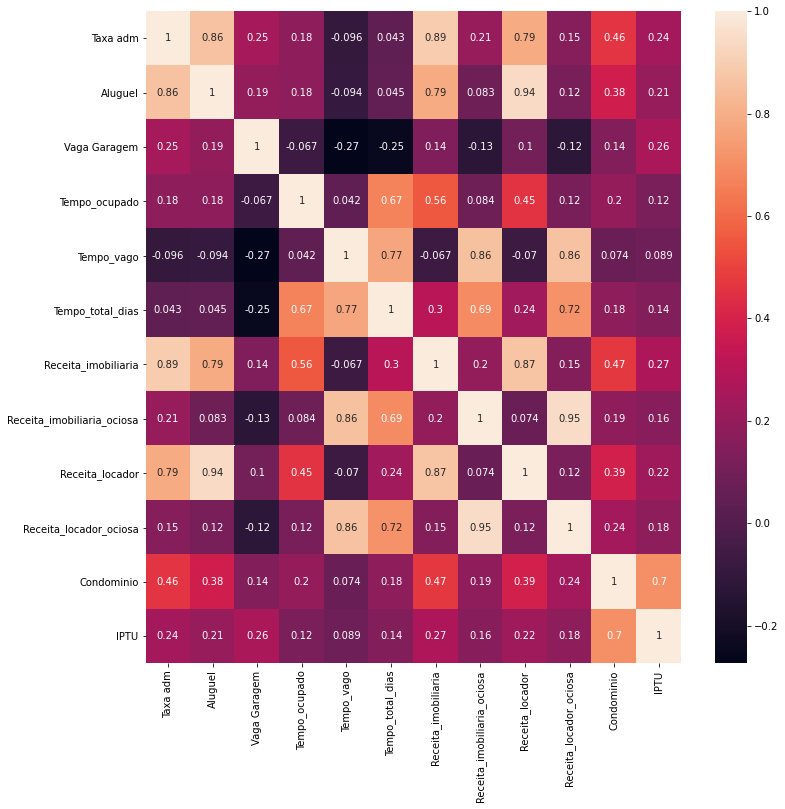

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_num, annot = True);

### Tempo vago pode ser um indicador de desempenho para o dashboard, pois apresenta altos níveis de correlação direta com Receitas ociosas tanto da imobiliária quanto do locador

In [13]:
df_kpi = corr_num[['Tempo_vago', 'Receita_imobiliaria_ociosa', 'Receita_locador_ociosa']]
df_kpi = df_kpi.loc[['Tempo_vago', 'Receita_imobiliaria_ociosa', 'Receita_locador_ociosa'],
          ['Tempo_vago', 'Receita_imobiliaria_ociosa', 'Receita_locador_ociosa']]

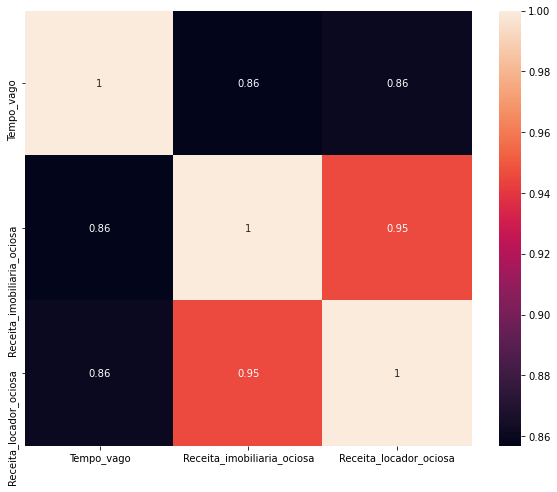

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df_kpi, annot = True);

In [15]:
cat

,Tipo,Lugar,Endereco,Portabilidade,Trim_inicio_contrato,Ano_contrato
0,Residencial,artarq 101,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T1-2020,2020
1,Residencial,artarq 162,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T1-2020,2020
2,Residencial,artarq 193,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T2-2018,2018
3,Residencial,artarq 203,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T2-2018,2018
4,Residencial,artarq 203,"Apartamento no Pinheiros, R. Doutor Virgílio...",nao,T2-2020,2020
...,...,...,...,...,...,...
168,Residencial,theber 145,"Loft no Brooklin Paulista, R. Kansas 1700 1...",nao,T3-2019,2019
169,Residencial,visarb 132,"Apartamento no Jaguaré, R. Alexandre Calame ...",sim,T3-2019,2019
170,Residencial,visarb 132,"Apartamento no Jaguaré, R. Alexandre Calame ...",nao,T2-2020,2020
171,Residencial,vxchange 83,"Apartamento no Jardim Paulista, R. Batataes ...",nao,T4-2019,2019


## 1. Imóveis com vagas em garagem possuem os menores tempos de vacância (maior parte do tempo ocupados), logo, maior receita para a imobiliária.

#### Features necessárias: "Tempo Ocupado" e "Tempo Vago"

In [16]:
# Vagas com e sem garagens
df['Vaga Garagem'].value_counts()

0    82
1    76
2    10
3     3
4     2
Name: Vaga Garagem, dtype: int64

In [17]:
# tem garagem entao tem ocupacao
# soma-se os tempos totais de todos os imoveis com garagem e sem garagem separadamente e faz-se uma estatistica
# dos tempos de ocupados dentro deste tempo total
# divide-se com e sem garagens em duas bases distintas
sem_garagem = df[df['Vaga Garagem'] == 0]
com_garagem = df[df['Vaga Garagem'] != 0]

### 1.1. Imóveis SEM garagem

In [18]:
# Tempo_total_dias, Tempo_ocupado
perc_sem = (sem_garagem['Tempo_ocupado'].sum()/sem_garagem['Tempo_total_dias'].sum()) * 100
print(f'percentual do tempo ocupado dos imóveis sem garagem é {perc_sem:,.2f}%')

percentual do tempo ocupado dos imóveis sem garagem é 71.59%


### 1.2. Imóveis COM garagem

In [19]:
# Tempo_total_dias, Tempo_ocupado
perc_com = (com_garagem['Tempo_ocupado'].sum()/com_garagem['Tempo_total_dias'].sum()) * 100
print(f'percentual do tempo ocupado dos imóveis sem garagem é {perc_com:,.2f}%')

percentual do tempo ocupado dos imóveis sem garagem é 84.67%


### Gráficos dos percentuais

In [20]:
tempo_total = df['Tempo_total_dias'].sum()
tempo_total

165683

In [21]:
# tem garagem
df['Tem_garagem'] = np.NaN

In [22]:
def classify_garage(num):
    if num > 0:
        return 'sim'
    else:
        return 'nao'


df['Tem_garagem'] = df['Vaga Garagem'].map(classify_garage)

In [23]:
df

,Início,Término,Tipo,Taxa de administração,Taxa adm,Aluguel,Vaga Garagem,Entrada_imobiliaria,Lugar,Numero_contrato,...,Portabilidade,Receita_imobiliaria,Receita_imobiliaria_ociosa,Receita_locador,Receita_locador_ociosa,Trim_inicio_contrato,Ano_contrato,Condominio,IPTU,Tem_garagem
0,2020-01-03,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2019-11-06,artarq 101,1,...,nao,8645.000000,551.00000,164255.00000,10469.00000,T1-2020,2020,1444.00,494.55,nao
1,2020-01-20,2022-07-01,Residencial,0.05,285.0000,5700.00,0,2020-01-03,artarq 162,1,...,nao,8483.500000,161.50000,161186.50000,3068.50000,T1-2020,2020,1444.00,494.55,nao
2,2018-05-18,2020-11-01,Residencial,0.04,180.8436,4521.09,1,2018-01-27,artarq 193,1,...,nao,5413.251760,669.12132,129918.04224,16058.91168,T2-2018,2018,800.39,308.98,sim
3,2018-05-01,2020-04-24,Residencial,0.07,300.4323,4291.89,1,2018-03-15,artarq 203,1,...,nao,7250.432840,470.67727,96327.17916,6253.28373,T2-2018,2018,800.39,308.98,sim
4,2020-04-24,2022-10-01,Residencial,0.07,304.5000,4350.00,1,2020-04-24,artarq 203,2,...,nao,9033.500000,0.00000,120016.50000,0.00000,T2-2020,2020,800.39,308.00,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2019-09-09,2022-03-01,Residencial,0.07,474.6861,6781.23,0,2019-06-12,theber 145,1,...,nao,14303.874480,1408.23543,190037.18952,18709.41357,T3-2019,2019,1568.10,636.83,nao
169,2019-09-15,2020-05-18,Residencial,0.07,168.0000,2400.00,0,2019-09-15,visarb 132,1,...,sim,1377.600000,0.00000,18302.40000,0.00000,T3-2019,2019,835.00,265.00,nao
170,2020-05-18,2022-11-01,Residencial,0.07,154.0000,2200.00,0,2020-05-18,visarb 132,2,...,nao,4604.600000,0.00000,61175.40000,0.00000,T2-2020,2020,835.00,265.00,nao
171,2019-12-01,2020-10-09,Residencial,0.07,220.5000,3150.00,0,2019-05-15,vxchange 83,1,...,nao,2300.550000,1470.00000,30564.45000,19530.00000,T4-2019,2019,964.14,246.73,nao


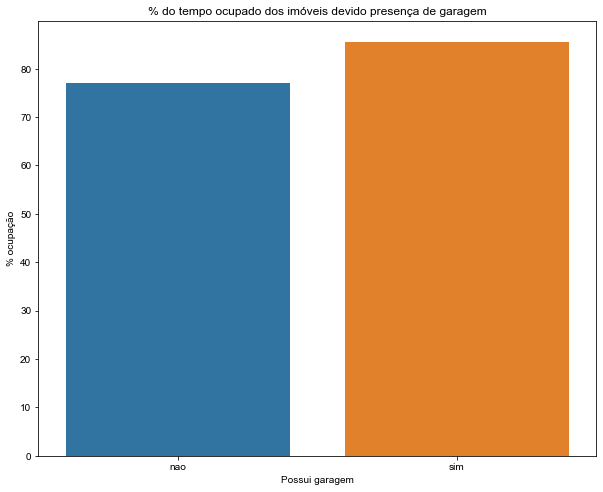

In [24]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Tem_garagem', y = ((df['Tempo_ocupado']/df['Tempo_total_dias']) * 100), data = df, ci = False);
plt.title('% do tempo ocupado dos imóveis devido presença de garagem', fontsize = 12);
plt.ylabel('% ocupação');
plt.xlabel('Possui garagem');
sns.set_style('darkgrid')

### Verdadeiro: os números de imóveis com e sem garagem são diferentes, logo, analisando-se em percentuais, imóveis com garagem têm um percentual de ocupação maior em relação ao tempo total que o imóvel se encontra na carteira da imobiliária

### Features criadas no Power Query nesta etapa: "Tempo_ocupado" e "Tempo_total_dias"

## 2. Imóveis com maior tempo de ocupação tendem a gerar maior receita a empresa.

In [25]:
# Tempo de ocupação, Receita Imobiliária
df_1 = df.copy()

In [26]:
#aux_1
aux_1 = df_1[['Lugar', 'Tempo_ocupado','Receita_imobiliaria']].groupby('Lugar').mean().reset_index()

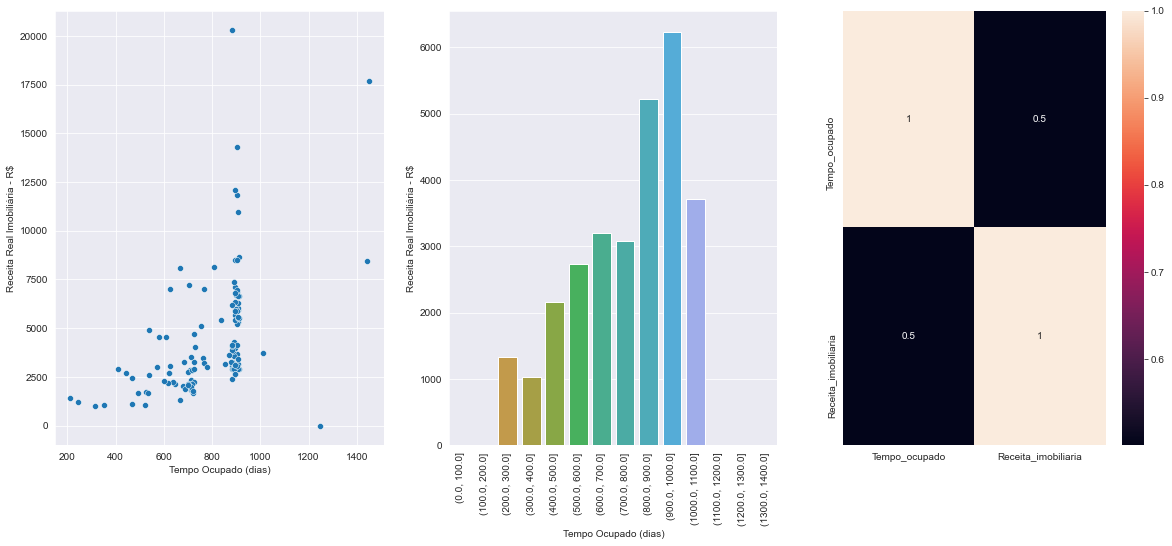

In [27]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')

plt.subplot(1,3,1)
plt.xlabel('Tempo Ocupado (dias)')
plt.ylabel('Receita Real Imobiliária - R$')
sns.scatterplot(x = 'Tempo_ocupado', y = 'Receita_imobiliaria', data = aux_1);

plt.subplot(1,3,2)
bins = list(np.arange(0, max(aux_1['Tempo_ocupado']), 100))
aux_1['Tempo_ocupado_bins'] = pd.cut(aux_1['Tempo_ocupado'], bins = bins)
sns.barplot(x = 'Tempo_ocupado_bins', y = 'Receita_imobiliaria', data = aux_1, ci = False);
plt.xticks(rotation = 90)
plt.xlabel('Tempo Ocupado (dias)')
plt.ylabel('Receita Real Imobiliária - R$')

plt.subplot(1,3,3)
sns.heatmap(aux_1.corr(method = 'pearson'), annot = True);

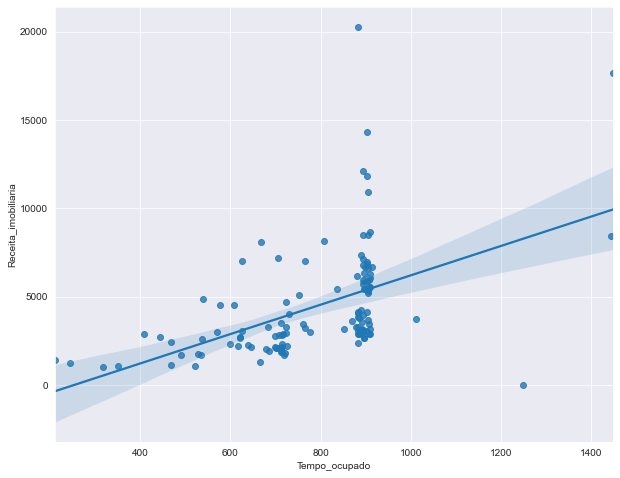

In [28]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Tempo_ocupado', y = 'Receita_imobiliaria', data = aux_1);

### Verdadeiro: Apesar de uma correlação não tão forte, percebe-se visualmente que um maior tempo de ocupação do imóvel oferece sim uma maior receita para a empresa. Até o tempo de ocupação em 1000 dias percebe-se essa tendência, após isto, o número de imóveis é insignificante. 

### Features criadas: "Receita Imobiliária"

## 3. Imóveis de transferência de carteira têm uma viabilidade econômica melhor para empresa devido à ausência do tempo ocioso (maior receita para a imobiliária).

In [39]:
df_2 = df.copy()

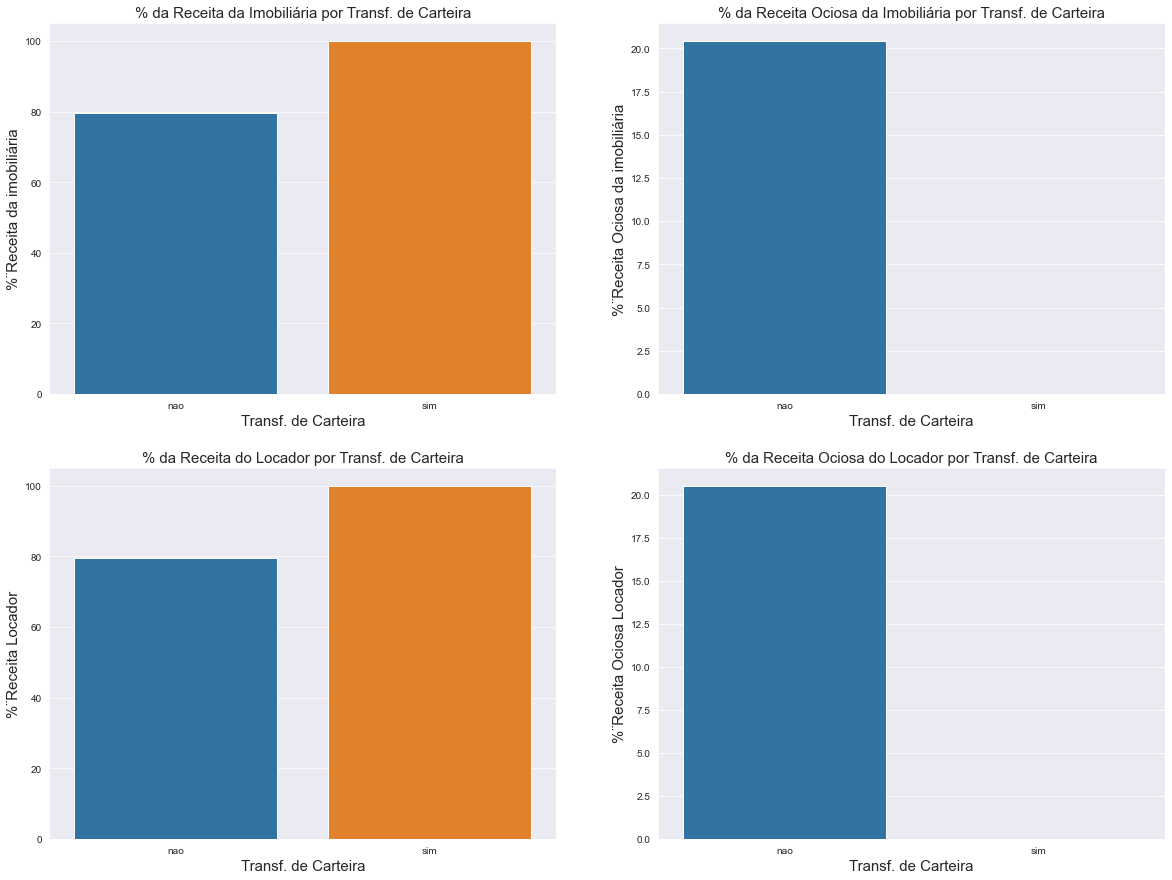

In [30]:
# graficos de percentuais de receita e receita ociosa para o locador e a imobiliária em relacao a "Portabilidade"
# Receita e Receita Ociosa para a Imobiliaria
Receita_proj_imob = df_2['Receita_imobiliaria'] + df_2['Receita_imobiliaria_ociosa']
Receita_proj_loca = df_2['Receita_locador'] + df_2['Receita_locador_ociosa']
#Receita imobiliaria
plt.figure(figsize = (20,15))
sns.set_style('darkgrid')

plt.subplot(2, 2, 1)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_imobiliaria'])/(Receita_proj_imob)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita da imobiliária', fontsize = 15);
plt.title('% da Receita da Imobiliária por Transf. de Carteira', fontsize = 15);

plt.subplot(2, 2, 2)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_imobiliaria_ociosa'])/(Receita_proj_imob)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita Ociosa da imobiliária', fontsize = 15);
plt.title('% da Receita Ociosa da Imobiliária por Transf. de Carteira', fontsize = 15);

# Receita e Receita Ociosa para o Locador
plt.subplot(2, 2, 3)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_locador'])/(Receita_proj_loca)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita Locador', fontsize = 15);
plt.title('% da Receita do Locador por Transf. de Carteira', fontsize = 15);

plt.subplot(2, 2, 4)
sns.barplot(x = 'Portabilidade',
            y = (((df_2['Receita_locador_ociosa'])/(Receita_proj_loca)) * 100),
            data = df_2,
           ci = False);
plt.xlabel('Transf. de Carteira', fontsize = 15);
plt.ylabel('%¨Receita Ociosa Locador', fontsize = 15);
plt.title('% da Receita Ociosa do Locador por Transf. de Carteira', fontsize = 15);

### Verdadeiro: o percentual das receitas arrecadadas tanto por parte da imobiliária quanto para os locadores proprietários atingem 100% para os imóveis que vieram de transferência de carteira e, análogamente, em receita ociosa para ambas as partes os mesmos imóveis têm 0% de receita ociosa, enquanto os imóveis que NÃO vieram de transferência de carteira possuem pouco mais de 20% de sua receita ociosa, receita proveniente do tempo do imóvel desocupado, enquanto os positivos para transferência de carteira não possuem absolutamente nenhum percentual para receitas não arrecadadas por tempo desocupado.

### Features Criadas: "Receita Imobiliária", "Receita Ociosa Imobiliária", "Receita Locador", "Receita Ociosa Locador"

## 4. Imóveis com menor valor de aluguel tendem a ter uma maior ocupação.

In [31]:
aux_2 = df_1[['Lugar' ,'Tempo_ocupado', 'Aluguel']].groupby('Lugar').mean().reset_index()

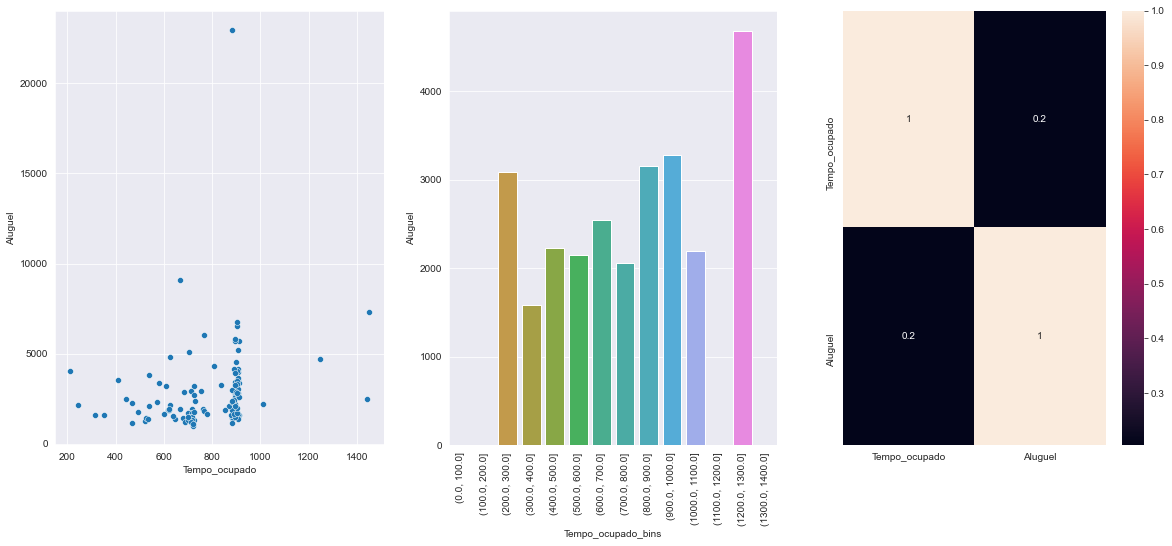

In [32]:
plt.figure(figsize = (20, 8));

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Tempo_ocupado', y = 'Aluguel' , data = aux_2)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, max(aux_2['Tempo_ocupado']), 100))
aux_2['Tempo_ocupado_bins'] = pd.cut(aux_2['Tempo_ocupado'], bins = bins)
sns.barplot(x = 'Tempo_ocupado_bins', y = 'Aluguel', data = aux_2, ci = False)
plt.xticks(rotation = 90)

plt.subplot(1, 3, 3)
sns.heatmap(aux_2.corr(method = 'pearson'), annot = True)

sns.set_style('darkgrid')

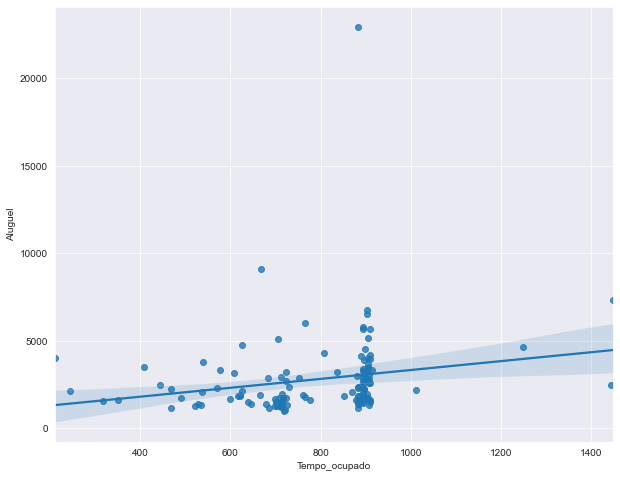

In [33]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Tempo_ocupado', y = 'Aluguel' , data = aux_2);

### Falso: Além de apresentar baixa correlação entre tempo ocupado e valor do aluguel, há uma diferença pouco significativa nas barras com, inclusive, maior concentração dos maiores aluguéis nos intervalos de maiores tempos de ocupação, ou seja, segundo os dados, imóveis com maior valor de aluguel tendem a ser os imóveis com  maiores valores de aluguéis. Apesar do senso comum dizer o contrário, imóveis mais baratos ficarem sempre ocupados devido ao preço atrativo, os imóveis mais caros apesar do preço mais elevado, matém uma taxa de ocupação maior que os de preços mais em conta devido à outros fatores que podem ser atrativos aos olhos do inquilino como por exemplo fatores relcionados à localização (valorização do bairro, segurança, facilidade de transporte/mobilidade, qualidade de vida do local) ou até mesmo a própria estrutura do imóvel. Resumindo: Preço dos imóveis não é o único fator decisivo para a preferência do cliente.

## 5. Imóveis com menor valor de aluguel tendem a oferecer maior receita para a imobiliária.

In [34]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Taxa adm                    173 non-null    float64
 1   Aluguel                     173 non-null    float64
 2   Vaga Garagem                173 non-null    int64  
 3   Tempo_ocupado               173 non-null    int64  
 4   Tempo_vago                  173 non-null    int64  
 5   Tempo_total_dias            173 non-null    int64  
 6   Receita_imobiliaria         173 non-null    float64
 7   Receita_imobiliaria_ociosa  173 non-null    float64
 8   Receita_locador             173 non-null    float64
 9   Receita_locador_ociosa      173 non-null    float64
 10  Condominio                  173 non-null    float64
 11  IPTU                        173 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 16.3 KB


In [35]:
#aux_4 = df_2[['Aluguel', 'Receita_imobiliaria']]
aux_3 = df_2[['Lugar', 'Aluguel', 'Receita_imobiliaria']].groupby('Lugar').mean().reset_index()

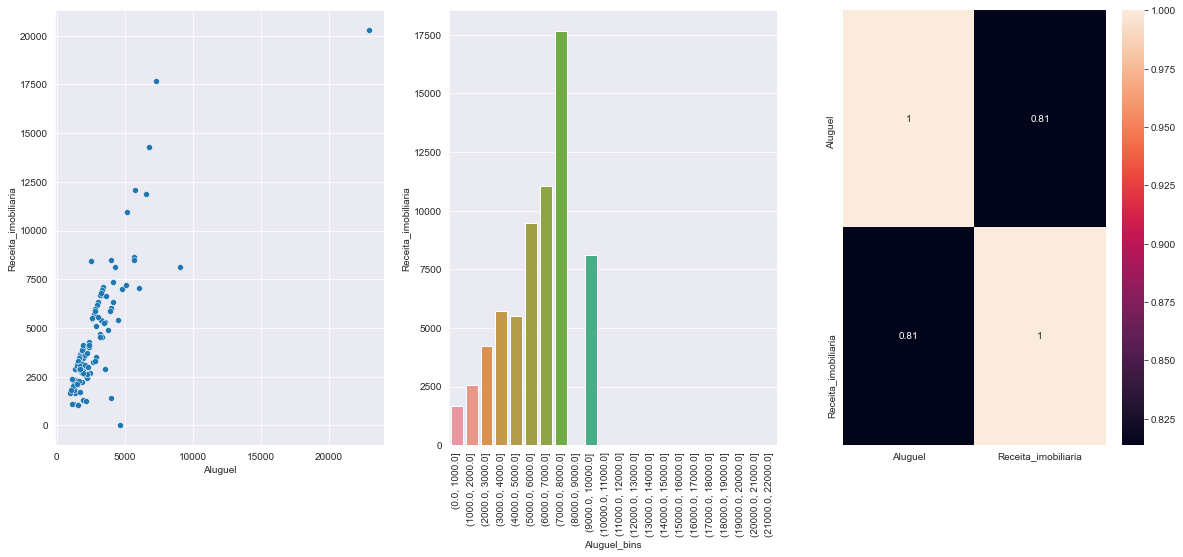

In [36]:
plt.figure(figsize = (20, 8));

plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Aluguel', y = 'Receita_imobiliaria' , data = aux_3)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, max(aux_3['Aluguel']), 1000))
aux_3['Aluguel_bins'] = pd.cut(aux_3['Aluguel'], bins = bins)
sns.barplot(x = 'Aluguel_bins', y = 'Receita_imobiliaria', data = aux_3, ci = False)
plt.xticks(rotation = 90)

plt.subplot(1, 3, 3)
sns.heatmap(aux_3.corr(method = 'pearson'), annot = True)

sns.set_style('darkgrid')

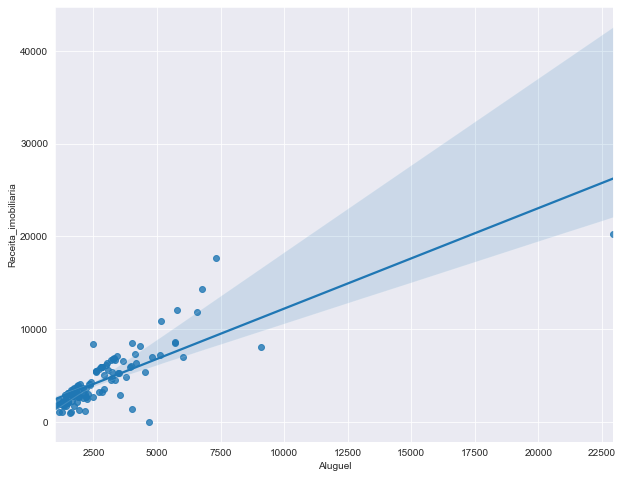

In [37]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'Aluguel', y = 'Receita_imobiliaria', data = aux_3);

### Falso: Imóveis com menores valores de aluguel oferecem sim maior receita à imobiliária, isto ocorre pois o valor do aluguel tem correlação direta com a receita da empresa, quanto maior o aluguel amior a taxa de admin. e maior a receita. O que poderia representar um cenário inverso seria o fato de imóveis com preços de aluguéis mais elevados apresentarem tempos vagos maiores, mas já foi verificado na hipótese anterior que isso não se aplica, que imóveis mais caros tendem a ter maior ocupação. 

## 6. Quanto maior o valor do aluguel maior a receita ociosa.

## 7. Imóveis com menores valores de aluguel oferecem menores receitas para a imobiliária.

## 8. Imóveis com maiores valores de aluguel representam maiores receitas para a imobiliária

## 9. Imóveis com mais contratos tendem a se manter ocupados por mais tempo.

## 10. Tempo de vacância com mais de 20% geram prejuízos à imobiliária.

## 11. Imóveis comerciais oferecem maior faturamento à imobiliária.